In [23]:
# It finds the exact match so for this we need to have exact image of what we are looking for
# matching is based on some sort of correlation 

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def load():
    global img
    original = cv2.imread("data/sammy.jpg")
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    img = original.copy()

In [50]:
def imshow(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap = 'gray')

In [19]:
load()

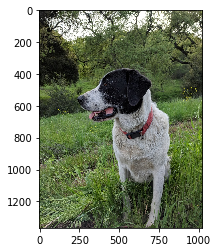

In [20]:
imshow(img)

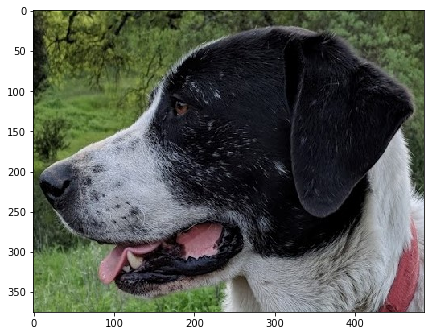

In [107]:
template = cv2.imread("data/sammy_face.jpg")
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
imshow(template)

In [108]:
# template matching methods
# https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

In [109]:
# template matching
res = cv2.matchTemplate(img, template, method =  cv2.TM_CCORR_NORMED)

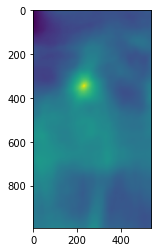

In [106]:
plt.imshow(res)

In [42]:
# the bright point is detected point in the image
# actually this is a heat map
# as the matching is based on heatmap so it above tells the heatmap where it thinks there is highest correlation

# TM_SQDIFF and TM_SQDIFF_NORMED works in different manner that it points the "mininum" when there is highest correlation.

# we will use min and max value to create the rectangle on the original image

In [45]:
# finding mininum value and its location and finding maximum value and its location
minval, maxval, minloc, maxloc = cv2.minMaxLoc(res)
cv2.minMaxLoc(res)   #location is in form of (x, y)

(0.49773579835891724, 0.9993709325790405, (0, 53), (231, 345))

In [81]:
cv2.circle(img, minloc, 15, color=(255, 0, 0), thickness=-1);  #red color pointing minimum location

In [82]:
cv2.circle(img, maxloc, 15, color=(0, 0, 255), thickness=-1);  #blue color pointing maximum location

In [97]:
# see the heatmap u will find these points have min and max value

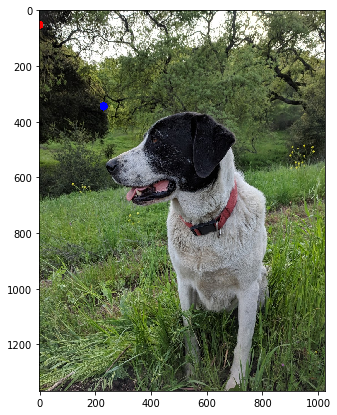

In [83]:
imshow(img)

In [102]:
# but since we are not using any of these methods TM_SQDIFF and TM_SQDIFF_NORMED so we need to use only maxloc

# if we use methods TM_SQDIFF or TM_SQDIFF_NORMED then we will use minloc in all the cells below instead of maxloc

In [85]:
# now creating rectangle on the face, so at first load the image.
load()

In [91]:
# row, column, channel for array
height, width, channel = template.shape
template.shape

(375, 486, 3)

In [90]:
# maxloc[0] represents x direction which is width of image
# maxloc[1] represents y direction which is the height of image

In [98]:
topleftcorner = maxloc
bottomrightcorner = (maxloc[0]+width, maxloc[1]+height)

# we have took top right and bottom left corner because we have to draw rectangle and these two vertivces are opposite to 
# each other

In [94]:
cv2.circle(img, topleftcorner, 15, (255, 0, 0), -1);  

cv2.circle(img, bottomrightcorner, 15, (255, 0, 0), -1); # semicolon prevents the output of cell

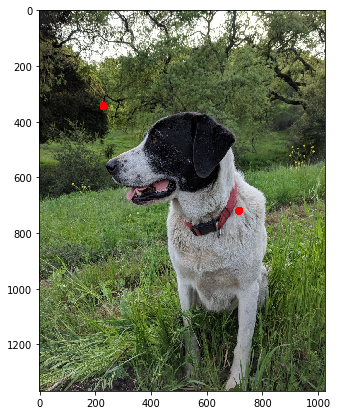

In [95]:
imshow(img)

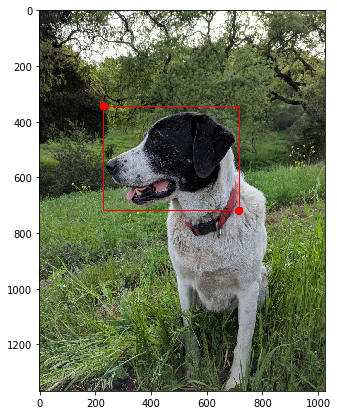

In [100]:
cv2.rectangle(img, pt1=topleftcorner, pt2=bottomrightcorner, color=(255, 0, 0), thickness=2)
imshow(img)

In [110]:
# if any rectangle line is missing then it means that image size is big wrt thickness of rectangle line so its solution is 
# increase the thickness